In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import matplotlib.cm as cm

import scipy
import scipy.cluster.hierarchy as sch
import time

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabaz_score
from IPython.core.display import display, HTML
from datetime import datetime, timedelta
pd.set_option('display.float_format', '{:.5g}'.format)

###################librerias propias

import Data_Manager as MgClus
import Algos_Clustering as AlClus


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
############### Carga datos

df = pd.read_csv('data/Datos.csv',delimiter=';',index_col='Timestamp',decimal=',')
df.index = pd.to_datetime(df.index)
print(df.shape)

(16813, 175)


In [3]:
############### retorna primeras 3 semanas
Gmeses=df.groupby(pd.TimeGrouper('W'))
Historial=[]
for W,(dateW,groupW) in enumerate(Gmeses):
    if(W > 3):
        df=pd.concat(Historial)
        break
    Historial.append(groupW)

print(df.shape)

(7820, 175)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


In [4]:
############### Retornos logaritmicos 
Datos=MgClus.DataManager(df)
Datos.Compute()

/proyect/notebooks/Data_Manager.py:42: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  Dis=self.__correlDist(corr).as_matrix()


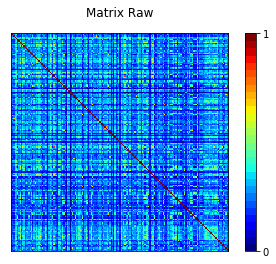

In [5]:
################ Matriz de correlaciones, covarianzas, Distancias
Datos.plot_matrix('Matrix Raw')


0


/proyect/notebooks/Algos_Clustering.py:141: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  Dtem=self.corr.as_matrix()


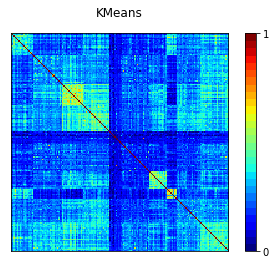

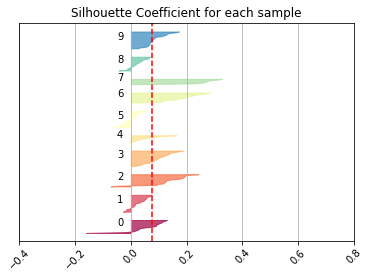

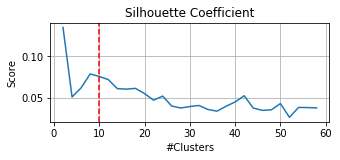

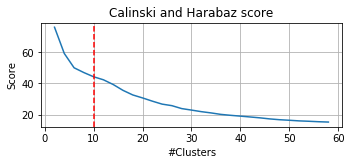

1


/proyect/notebooks/Algos_Clustering.py:133: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  Dtem=self.corr.as_matrix()


/usr/local/lib/python3.5/dist-packages/sklearn/cluster/spectral.py:442: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


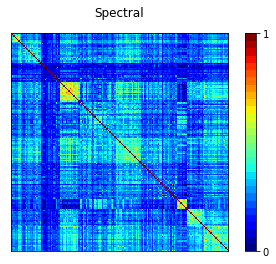

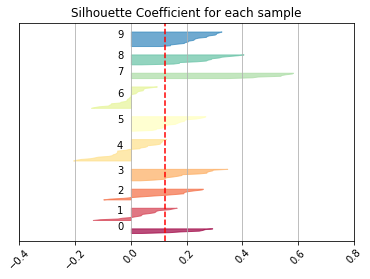

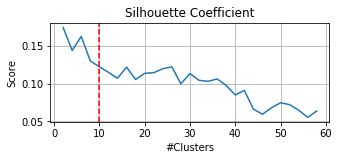

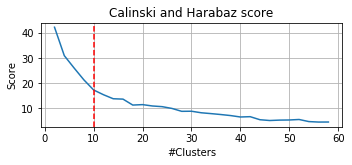

2


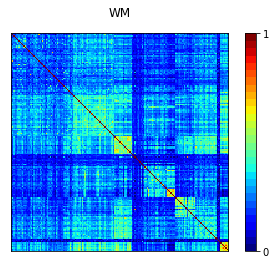

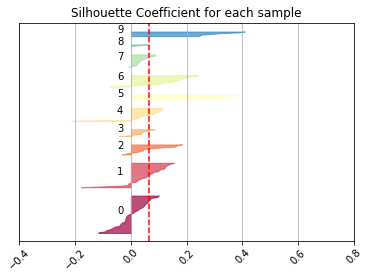

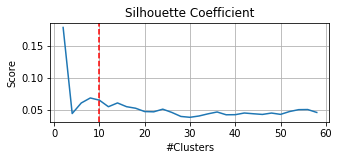

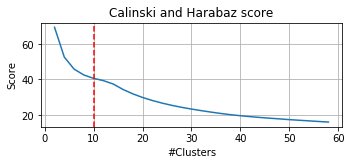

3


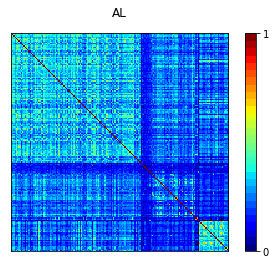

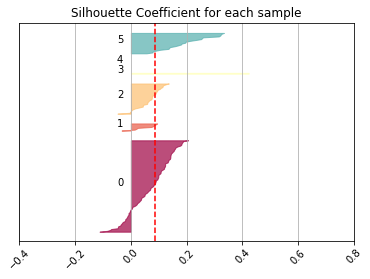

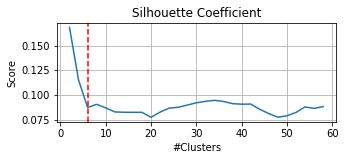

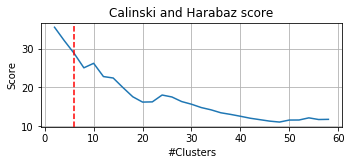

4


/usr/local/lib/python3.5/dist-packages/sklearn/cluster/birch.py:77: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  node1_dist, node2_dist = dist[[farthest_idx]]


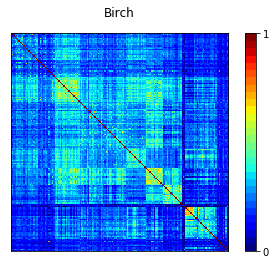

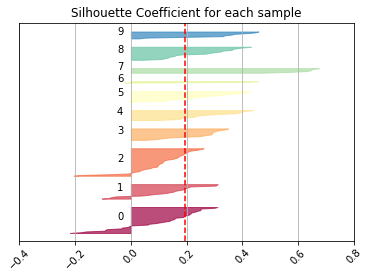

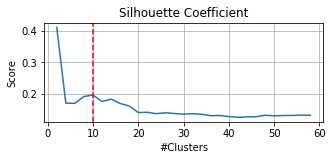

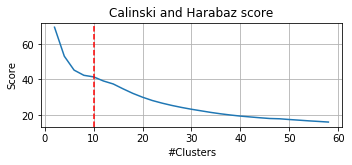

5


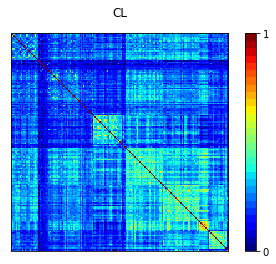

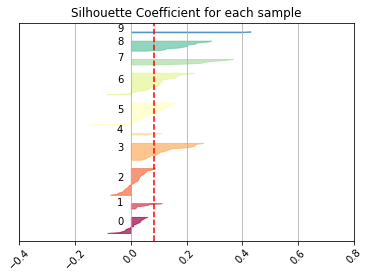

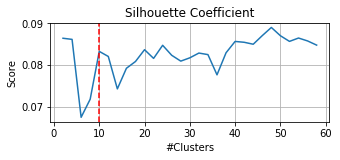

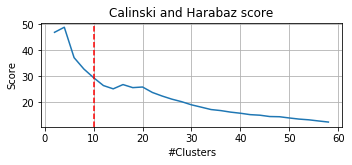

6


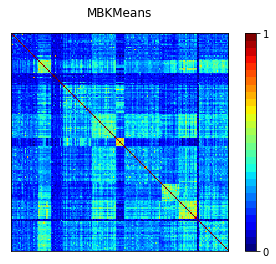

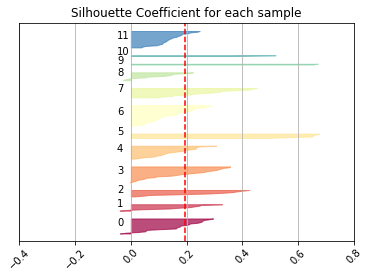

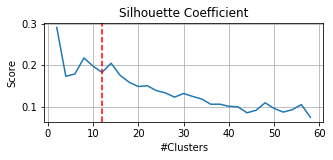

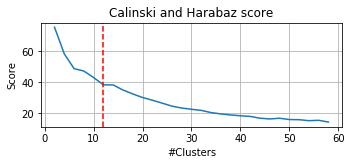

7


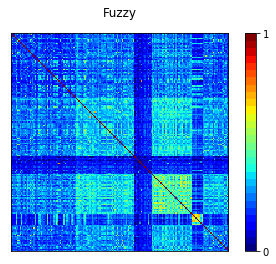

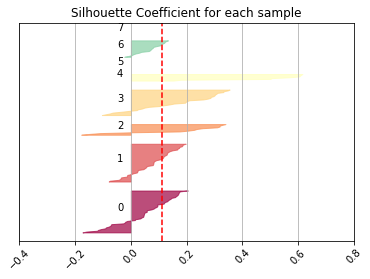

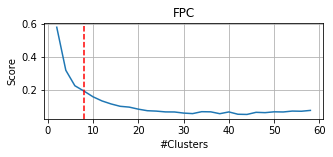

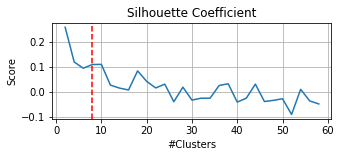

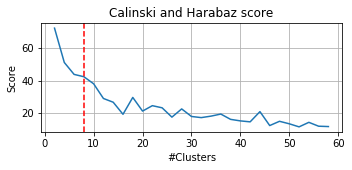

In [6]:
MgClusters=AlClus.ClusterManager()
MgClusters.TestTrainAndPlot(Datos)

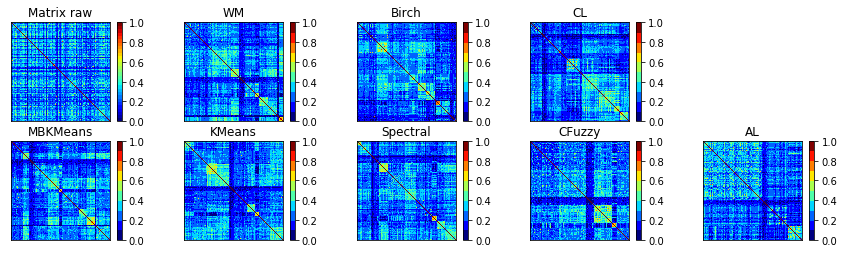

In [7]:
MgClusters.MatrixArrayPlot(Datos.D0,'Matrix raw')

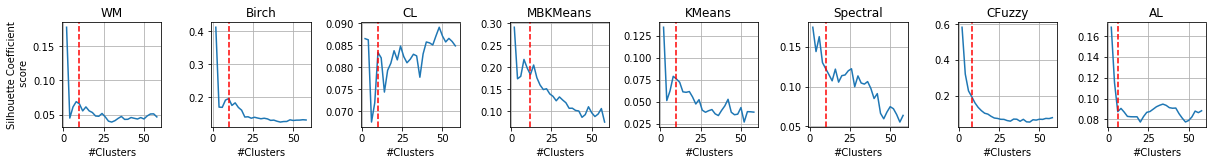

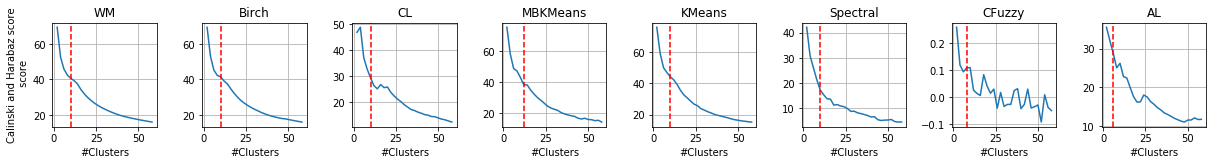

In [8]:
MgClusters.Calinski_SilhouetteArrayPlot()

/usr/local/lib/python3.5/dist-packages/sklearn/cluster/spectral.py:442: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/usr/local/lib/python3.5/dist-packages/sklearn/cluster/birch.py:77: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  node1_dist, node2_dist = dist[[farthest_idx]]


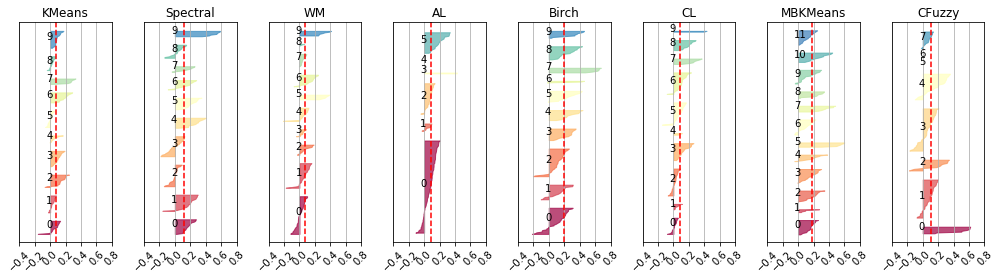

In [9]:
MgClusters.SilhouettePlotArray(Datos)